### Cost Function

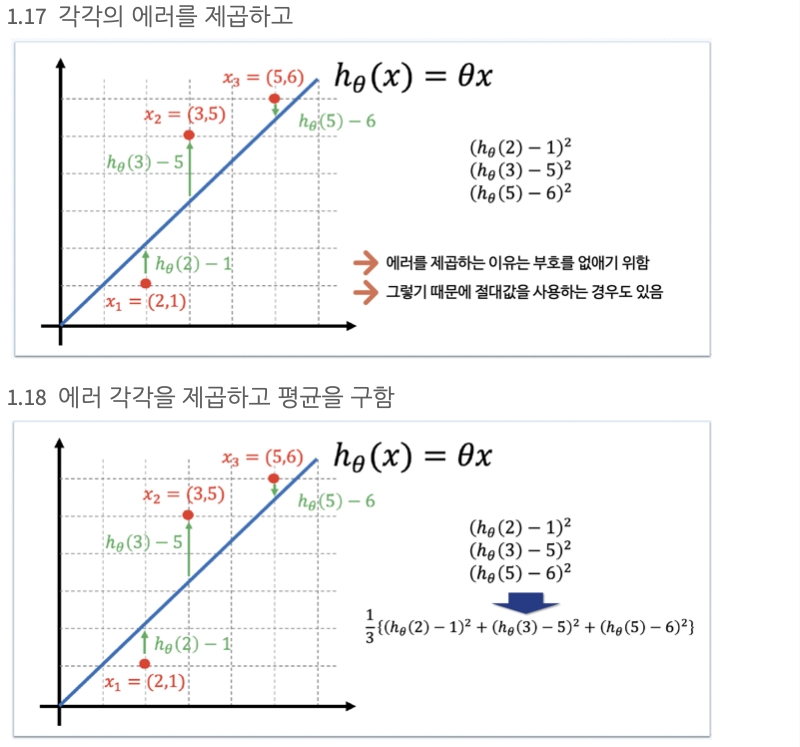

In [7]:
import numpy as np

np.poly1d([2, -1])**2 + np.poly1d([3, -5])**2, +np.poly1d([5, -6])**2

(poly1d([ 13, -34,  26]), poly1d([ 25, -60,  36]))

In [8]:
import sympy as sym

th = sym.Symbol("th")
diff_th = sym.diff(38*th**2 - 94*th + 62, th)
diff_th

76*th - 94

## 보스턴 집값 예측

In [9]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
[each for each in boston.feature_names]

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [11]:
import pandas as pd

boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd['PRICE'] = boston.target

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# 집값 분포도 확인
import plotly_express as px

fig = px.histogram(boston_pd, x='PRICE')
fig.show()

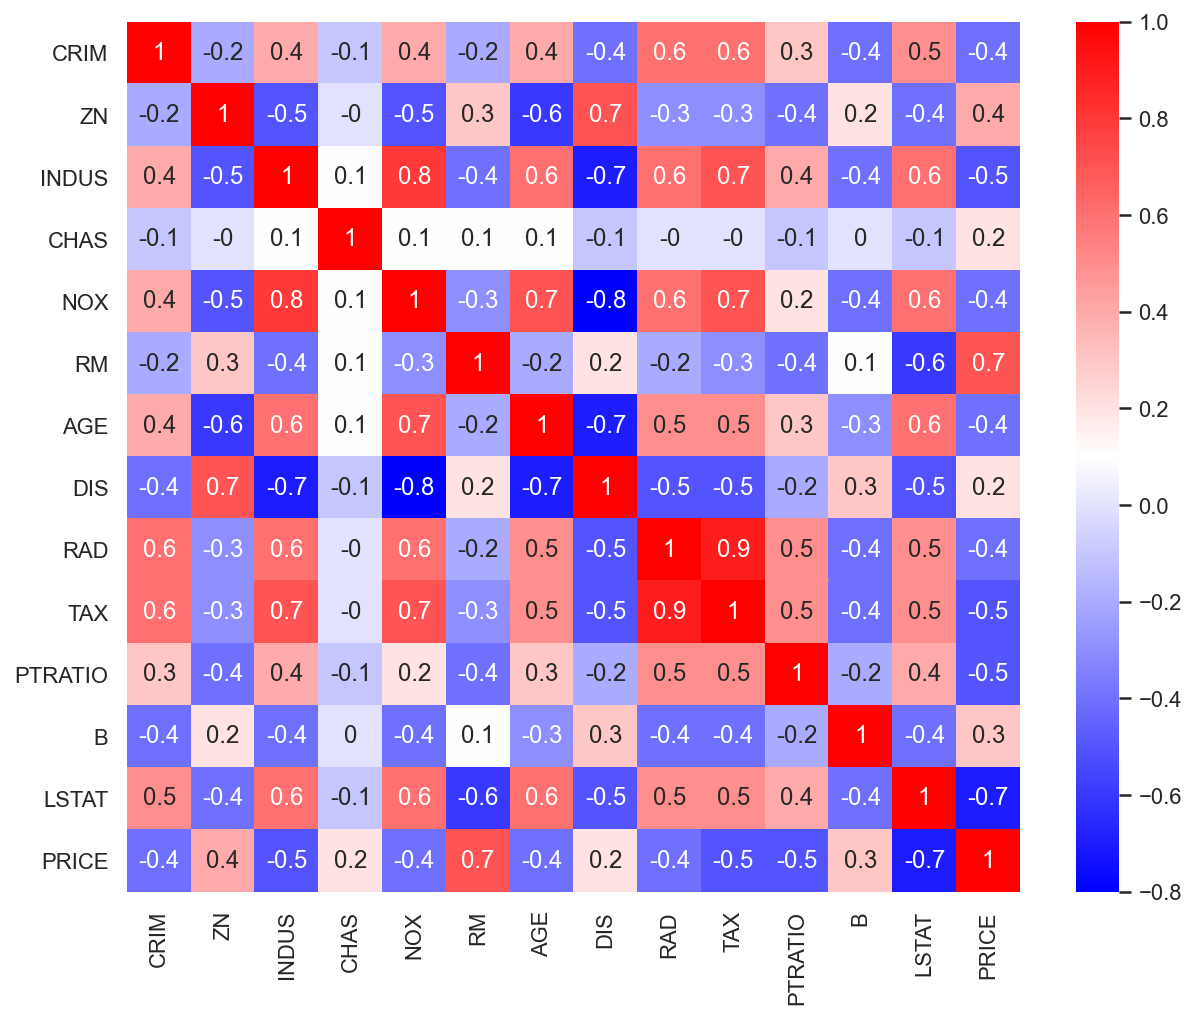

In [18]:
# 상관계수 확인
import matplotlib.pyplot as plt
import seaborn as sns

corr_mat = boston_pd.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='bwr');

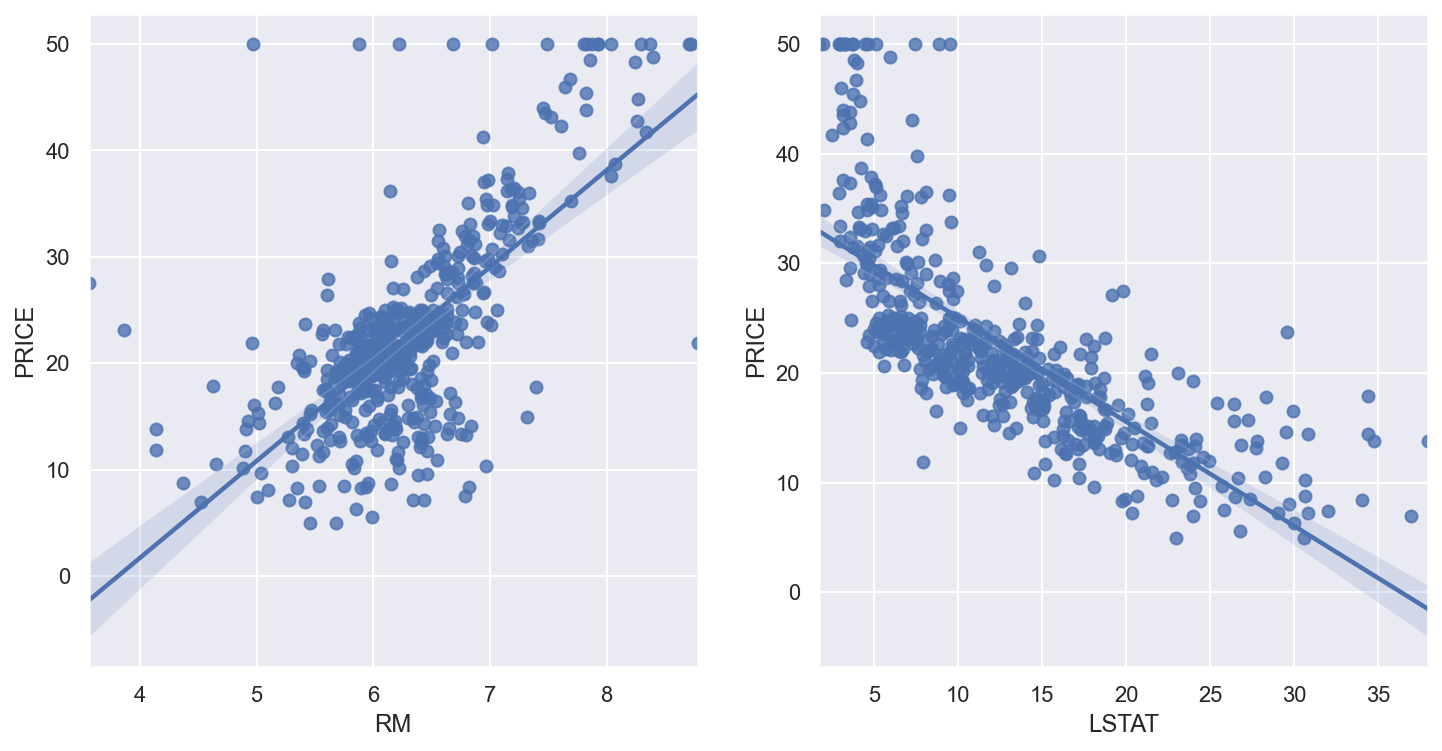

In [20]:
# RM과 LSTAT과 PRICE의 관계에 대해 좀 더 알아보자
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})

fig, ax = plt.subplots(ncols=2)
sns.regplot(x='RM', y='PRICE', data=boston_pd, ax=ax[0])
sns.regplot(x='LSTAT', y='PRICE', data=boston_pd, ax=ax[1])

- 저소득층 인구가 낮을수록, 방의 갯수가 많은수록 집 값이 높아지나?
- 이 가설은 문제가 없을까?

In [25]:
# 트레인 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [26]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [28]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_te = reg.predict(X_test)
rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_te = np.sqrt(mean_squared_error(y_test, pred_te))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_te)

RMSE of Train Data :  4.642806069019824
RMSE of Test Data :  4.9313525841467065


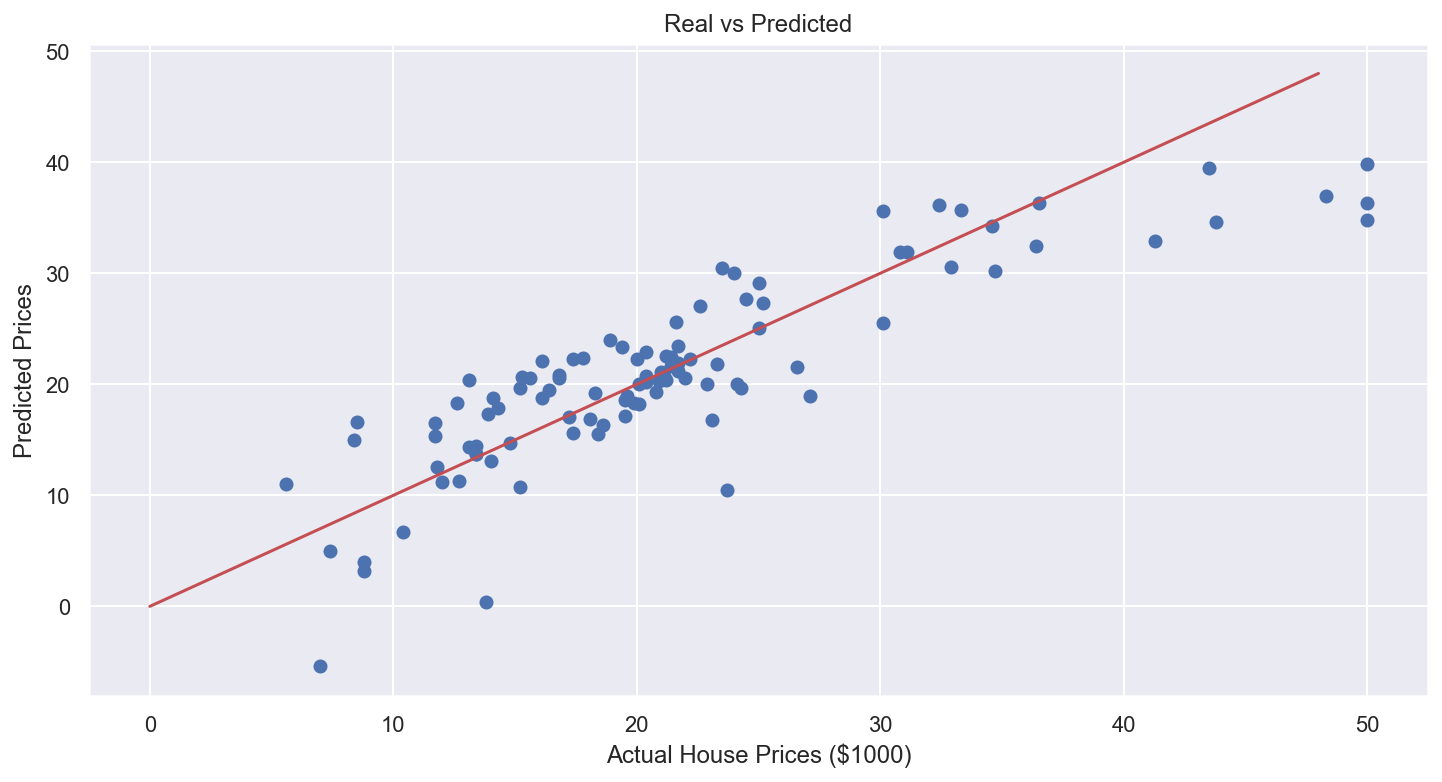

In [37]:
plt.scatter(y_test, pred_te)
plt.xlabel('Actual House Prices ($1000)')
plt.ylabel('Predicted Prices')
plt.title('Real vs Predicted')
plt.plot([0, 48], [0, 48], 'r')
# x범위의 값들, y범위의 값들 조합한 일직선 그리기
plt.show()